1. ## Introduction of the dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

### Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

#### Labels

Each training and test example is assigned to one of the following labels:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot


## Pipeline  to build the model

1. import the libraray
2. Load the train and test data set
3. Explore the data
4. Preprocess the data
5. Build the model
6. Train the model
7. Evalauate the model
8. Predict the test data

## 1. Import the libraray

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras 
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dropout, Flatten ,Dense,BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


## 2. Load the dataset (train and test data)

In [2]:
train_data=pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
test_data=pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 3. Explore the data

In [4]:
train_data.shape, test_data.shape

((60000, 785), (10000, 785))

In [5]:
train_data.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [6]:
test_data.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [7]:
train_data=np.array(train_data, dtype='float32')
test_data=np.array(test_data, dtype='float32')

In [8]:
x_train=train_data[:, 1:]   ## independent variable becoz first column sre dependent feature (label)
y_train=train_data[:,0]     ## dependent feature (label)
x_test=test_data[:, 1:]
y_test=test_data[:, 0]    

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

## 4. Preprocess the data
Data must be preprocessed before the buildding the network. In the dataset , image pixel value fall in range 0 to 255.


In [10]:
## normalize the data
x_train=x_train/255.0
x_test=x_test/255.0


In [11]:
x_train=x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test=x_test.reshape(x_test.shape[0], 28, 28, 1)


In [12]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

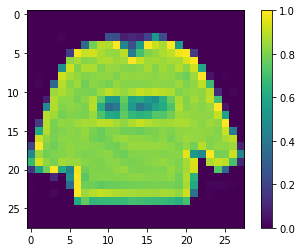

In [13]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show() 
## here pixel value are between 0 to 1

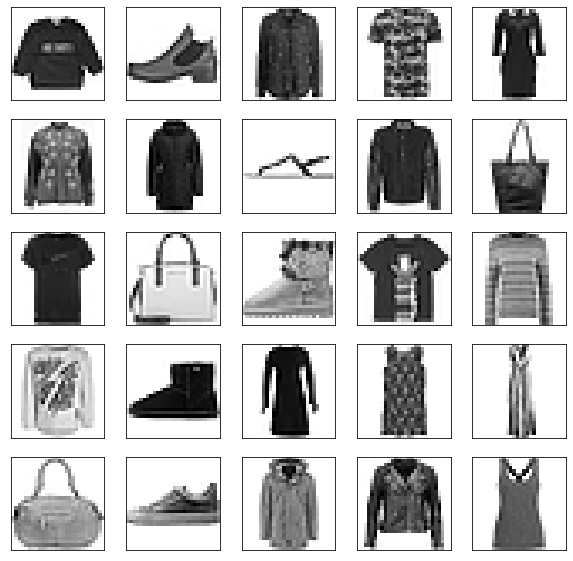

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    

## Build the model

In [15]:
batch_size=128
epochs=10

model=Sequential()
model.add(layers.Conv2D(32, (3,3) , padding='same',activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

tf.keras.Flatten() transform the format of the image from two dimensional array into 1-D array . This layers has no parameters to  learn , it is used for reformat.
tf.keras.Dense() is used for fully connected , neural network

## Compile the model 
1. loss function -This measures how accurate the model during training
2. Optimizers- How the model is updated based on the data
3. metrics- check the accuracy of the model (training)

In [16]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer='adam',
            metrics=['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 804,682
Trainable params: 804,618
Non-trainable params: 64
_________________________________________________

### Train the model

In [17]:
history=model.fit(x_train ,y_train, epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4535 - accuracy: 0.8435
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2203 - accuracy: 0.9191
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1749 - accuracy: 0.9361
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1407 - accuracy: 0.9464
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1102 - accuracy: 0.9589
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0908 - accuracy: 0.9670
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0730 - accuracy: 0.9729
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0653 - accuracy: 0.9773
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0509 - accuracy: 0.9814
Epoch 10/10
1875/1875 [==============================] - 36s 19m

This mpdel give the auuracy 98% on the training data

## Evaluate the model

In [18]:
test_loss, test_acc=model.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - loss: 0.4546 - accuracy: 0.9158


In [19]:
print("test loss", test_loss)
print('test_acc', test_acc)

test loss 0.45460277795791626
test_acc 0.9157999753952026


Our training data give the accuracy ~98% and generalize 90% on unseen data 

## check the loss and accuracy of the training data i plot figure

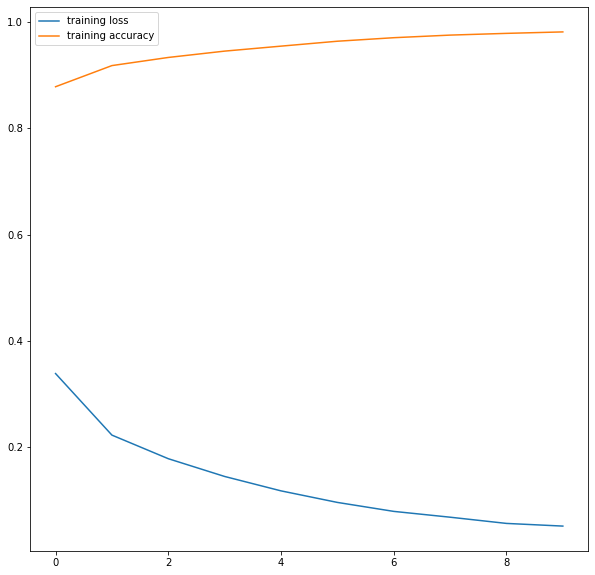

In [20]:
loss=history.history['loss']
accuracy=history.history['accuracy']
epochs1=range(0, len(accuracy))
plt.figure(figsize=(10,10))
plt.plot(epochs1, loss, label='training loss')
plt.plot(epochs1, accuracy, label='training accuracy')
plt.legend()
plt.show()

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:



In [21]:
predict=model.predict(x_test)


In [22]:
predict[0]

array([1.0000000e+00, 1.0930822e-21, 3.8350594e-15, 9.9206328e-15,
       4.0820868e-08, 4.6648555e-25, 5.5532208e-08, 7.7513110e-17,
       1.8645684e-19, 1.0248782e-16], dtype=float32)

A prediction is an array of 10 numbers .They represent the model confidense becoz data contain the 10 different catefories.

In [23]:
np.argmax(predict[0])

0

In [24]:
y_test[0]

0.0

## Add Dropout layer 

In [25]:
batch_size=128
epochs=10

model=Sequential()
model.add(layers.Conv2D(32, (3,3) , padding='same',activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [26]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer='adam',
            metrics=['accuracy'] )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [27]:
history=model.fit(x_train ,y_train, epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.4894 - accuracy: 0.8277
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2843 - accuracy: 0.8970
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2386 - accuracy: 0.9118
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2107 - accuracy: 0.9224
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1928 - accuracy: 0.9299
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1808 - accuracy: 0.9339
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1622 - accuracy: 0.9408
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1415 - accuracy: 0.9477
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1290 - accuracy: 0.9519
Epoch 10/10
1875/1875 [==============================] - 37s 20m

In [28]:
test_loss, test_acc=model.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - loss: 0.2432 - accuracy: 0.9219


When we add a dropout layer in CNN , this give the accuracy 95.5% on the training data and generalize the ~92% on the unseen data

In [29]:
print("loss", test_loss)
print("test Accuracy", test_acc)

loss 0.24318374693393707
test Accuracy 0.9218999743461609


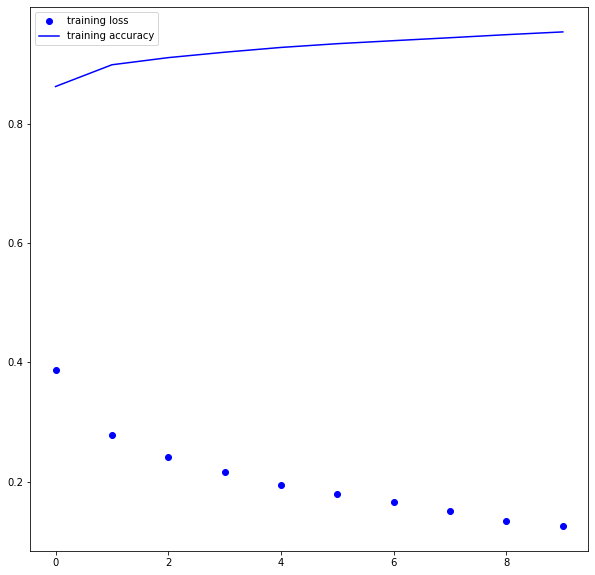

In [30]:
loss=history.history['loss']
accuracy=history.history['accuracy']
epochs1=range(0, len(accuracy))
plt.figure(figsize=(10,10))
plt.plot(epochs1, loss,'bo', label='training loss')
plt.plot(epochs1, accuracy,'b', label='training accuracy')
plt.legend()
plt.grid(False)
plt.show()

In [31]:
predict=model.predict(x_test)

In [32]:
np.argmax(predict[0])

0

In [33]:
y_test[0]

0.0

In [34]:
## Thanks for reading this notebook, If this notebook is useful, please comment
